<img src="Local\imgs\U1\banner_fcd.jpg" alt="banner" width="1100"  height="150">

# <span style="color:black;"><strong>Exploración y Análisis de datos</strong></span>  
---
<p align="right">
  <a href="https://colab.research.google.com/github/mariabda2/intro_data_2025/blob/main/FCD_U3_EDA.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>

## <span style="color:#2F749F;"><strong>🎯 Objetivos de aprendizaje</strong></span>

> ✅ Comprender el propósito y las etapas principales del **análisis exploratorio de datos (EDA)** como fase fundamental en proyectos de ciencia de datos.  
>  
> ✅ Identificar y caracterizar las variables de un conjunto de datos mediante **estadísticos descriptivos, tablas y representaciones gráficas**.  
>  
> ✅ Aplicar técnicas de **análisis univariado, bivariado y multivariado** para explorar patrones, relaciones y distribuciones.  
>  
> ✅ Detectar y analizar posibles **valores atípicos, datos faltantes y errores de registro**, evaluando su impacto en el análisis.  
>  
> ✅ Desarrollar habilidades prácticas en **Python** para la implementación de procesos de EDA, integrando librerías como *pandas, matplotlib y seaborn*.  
>  
> ✅ Comunicar hallazgos de manera clara mediante la **organización de notebooks, reportes visuales y conclusiones sustentadas en evidencia empírica**.  

# <span style="color:#2F749F;"><strong>Introducción</strong></span>

El **Análisis Exploratorio de Datos (EDA, por sus siglas en inglés: Exploratory Data Analysis)** es una fase crítica y dinámica en el ciclo de vida de cualquier proyecto de análisis de datos, estadística o ciencia de datos.  
En este momento los datos comienzan a **contar su propia historia**: se examinan, se resumen y se visualizan con el objetivo de:

1. Comprender su **estructura interna**  
2. Identificar **patrones relevantes**  
3. Detectar **anomalías** que podrían representar riesgos u oportunidades  
4. Descubrir **relaciones entre variables**  
5. Verificar **supuestos estadísticos** antes de aplicar modelos predictivos o inferenciales  

El EDA es de naturaleza **exploratoria e inductiva**, lo que significa que permite que los datos <strong><font color='blue'>"hablen por sí mismos"</font></strong> sin imponer restricciones iniciales.  
Puede pensarse como una **brújula en un territorio desconocido**: orienta las decisiones posteriores en la limpieza, la transformación y el modelado de la información.  

Un <strong><font color='red'>buen EDA</font></strong> no solo eleva la calidad del análisis, sino que también puede <strong><font color='blue'>revelar conocimientos ocultos</font></strong>, como si se tratara de **pistas en una investigación**. Estos hallazgos ayudan a prevenir errores, a diseñar estrategias analíticas más sólidas y a comunicar resultados de manera clara y convincente a diferentes audiencias, tanto técnicas como no especializadas.  

Al abordar esta etapa conviene plantearse preguntas esenciales como:  
- ¿Qué tipo de variables hay (categóricas, numéricas, fechas)?  
- ¿Existen **valores faltantes** o **atípicos (outliers)**?  
- ¿Cuál es la **distribución** de cada variable?  
- ¿Qué **relaciones** surgen entre variables?  
- ¿Se evidencian **errores o inconsistencias** en los datos?  

En definitiva, el EDA es la **primera conversación con los datos**: una práctica que combina curiosidad, método y creatividad, y que marca el rumbo de todo análisis posterior.

🔧 **Técnicas comunes de EDA**

| Tipo de Análisis           | Ejemplos de Técnicas                                   |
| -------------------------- | ------------------------------------------------------ |
| **Univariado**             | Histogramas, boxplots, estadísticas descriptivas.      |
| **Bivariado/Multivariado** | Correlación, diagramas de dispersión, tablas cruzadas. |
| **Detección de problemas** | Detección de valores nulos, duplicados, outliers.      |
| **Transformaciones**       | Conversión de tipos de datos, escalado, normalización. |

**¿Por qué es importante realizar un EDA?**
1. Detectar errores antes de modelar.
2. Generar hipótesis sobre los datos.
3. Guiar decisiones sobre qué variables usar o transformar.
4. Comunicar hallazgos con claridad a públicos técnicos y no técnicos.

In [3]:
#librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
import plotly.express as px
import plotly.graph_objects as go


## <strong><font color='blue'>1. Carga y descripción inicial del dataset</font></strong>

📁 Dataset de ejemplo: Titanic
<br> Este conjunto de datos contiene información sobre los pasajeros que viajaban a bordo del RMS Titanic, el famoso barco que se hundió en 1912. El objetivo más común al analizar este dataset es predecir la probabilidad de supervivencia de los pasajeros en función de características como su edad, sexo, clase social, tarifa pagada, entre otros.

**Variables principales:**
- Survived: indica si el pasajero sobrevivió (1) o no (0).
- Pclass: clase del pasajero (1ª, 2ª, 3ª).
- Sex: sexo del pasajero.
- Age: edad del pasajero.
- SibSp: número de hermanos/cónyuges a bordo.
- Parch: número de padres/hijos a bordo.
- Fare: tarifa pagada por el boleto.
- Embarked: puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton).

In [4]:
# Dataset de ejemplo: Titanic (puede cambiarse por otro)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Vista general
print("Primeras filas del dataset:")
display(df.head())

# Tamaño, tipos de variables y valores nulos
print("\nInformación general:")
df.info()

print("\nResumen estadístico:")
display(df.describe(include='all'))

print("\nValores nulos por columna:")
display(df.isnull().sum())

Primeras filas del dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Resumen estadístico:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN



Valores nulos por columna:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## <strong><font color='blue'> 2. Limpieza y transformación de datos</font></strong>

**Variables del Dataset Titanic**

| 🧩 Variable      | 📐 Tipo        | 📝 Descripción                                                                 |
|------------------|---------------|---------------------------------------------------------------------------------|
| 🆔 PassengerId   | Entero        | Identificador único para cada pasajero                                         |
| 🛟 Survived      | Binaria       | Indicador de supervivencia (0 = No, 1 = Sí)                                    |
| 🪑 Pclass        | Entero        | Clase socioeconómica (1 = Primera, 2 = Segunda, 3 = Tercera)                   |
| 🧑‍💼 Name          | Texto         | Nombre completo del pasajero                                                   |
| ⚧ Sex           | Categórica    | Sexo del pasajero (`male` o `female`)                                          |
| 🎂 Age           | Numérica      | Edad del pasajero en años                                                      |
| 👫 SibSp         | Entero        | Número de hermanos o cónyuge a bordo                                           |
| 👨‍👩‍👧 Parch         | Entero        | Número de padres o hijos a bordo                                               |
| 🎫 Ticket        | Texto         | Código del boleto                                                              |
| 💲 Fare          | Numérica      | Precio del boleto                                                              |
| 🚪 Cabin         | Texto         | Número de cabina asignada                                                      |
| ⚓ Embarked      | Categórica    | Puerto de embarque (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton)     |



### **Eliminación de variables**
Variables eliminadas por irrelevancia:
- `Name`: Puede usarse para extraer títulos (Sr., Mrs., etc.) pero no aporta directamente al EDA.
- `Ticket`: Código del boleto, poco útil sin procesamiento extra.
- `Cabin`: Muchos valores faltantes, difícil de usar directamente.

In [5]:
# Limpieza de columnas irrelevantes 
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

### **Imputación de variables**
Se imputa valores faltantes en `Age` y `Embarked`.

In [6]:
# Imputación de valores faltantes 
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

### **Tratamiento de Variables Categóricas**
Las variables categóricas son cruciales en cualquier análisis, pero necesitan un tratamiento especial para que los modelos y análisis estadísticos las entiendan correctamente. Principalmente el manejo se estas variables se realiza a través de:
- Visualización: Se utilizan gráficos como countplot, barplot, o pie chart para observar la distribución de categorías.
- Cruces con variables numéricas: Usar boxplot o violinplot para ver cómo varía una variable numérica según cada categoría.
- Agrupamientos (groupby): Para obtener estadísticas descriptivas por categoría.

Las variables categóricas deben transformarse en un formato numérico. Aquí algunas técnicas:

| 🛠️ Técnica            | 📋 Descripción                                                                 | ✅ Recomendación de uso                            |
|------------------------|----------------------------------------------------------------------------------|----------------------------------------------------|
| 🎯 Label Encoding       | Asigna un número entero a cada categoría                                        | Solo si las categorías tienen orden (ordinal)     |
| 🧩 One-Hot Encoding     | Crea columnas binarias para cada categoría                                       | Ideal para categorías sin orden lógico            |
| ⚙️ Binary Encoding      | Convierte categorías en formato binario distribuido en varias columnas          | Útil si hay muchas categorías únicas              |
| 📊 Frequency Encoding   | Sustituye categorías por su frecuencia en el dataset                            | Eficiente y simple, funciona bien en modelos lineales |
| 🎯 Target Encoding      | Sustituye por la media de la variable objetivo según categoría                   | Muy potente, pero se debe usar con cuidado por riesgo de sobreajuste |

Acción:
- Se convirtieron `Sex` y `Embarked` a variables categóricas.

In [7]:
# Conversión de variables categóricas 
#df['Sex'] = df['Sex'].astype('category')
#df['Embarked'] = df['Embarked'].astype('category')
#
df['Sex'] = df['Sex'].astype(str)
df['Embarked'] = df['Embarked'].astype('str')

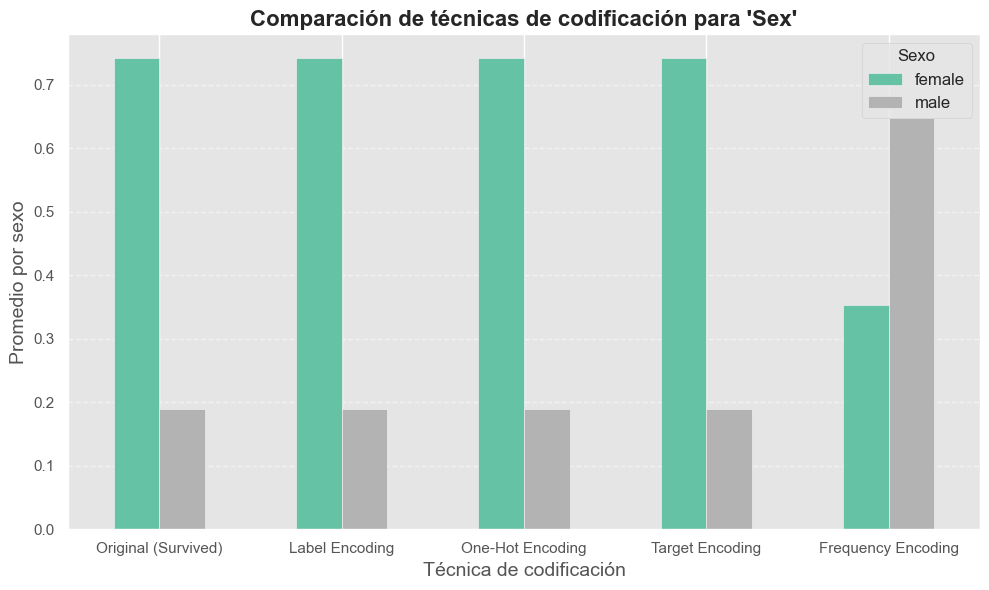

In [8]:
# Configuración visual
sns.set_theme(style="whitegrid")
plt.style.use('ggplot')

# Codificaciones sobre 'Sex'
# Label Encoding
le = LabelEncoder()
df['Sex_LE'] = le.fit_transform(df['Sex'])  # 0 = female, 1 = male
sex_map = dict(zip(range(len(le.classes_)), le.classes_))
label_encoded = df.groupby('Sex_LE')['Survived'].mean()
label_encoded.index = label_encoded.index.map(sex_map)

# One-Hot Encoding (sin drop_first para conservar ambas categorías)
df_ohe = pd.get_dummies(df['Sex'], prefix='Sex', drop_first=False)
df = pd.concat([df, df_ohe], axis=1)
onehot_encoded = {
    'female': df[df['Sex_female'] == 1]['Survived'].mean(),
    'male': df[df['Sex_male'] == 1]['Survived'].mean()
}

# Target Encoding
df['Sex_TE'] = df.groupby('Sex')['Survived'].transform('mean')
target_encoded = df.groupby('Sex')['Sex_TE'].mean()

# Frequency Encoding
df['Sex_FE'] = df['Sex'].map(df['Sex'].value_counts(normalize=True))
freq_encoded = df.groupby('Sex')['Sex_FE'].mean()

# Valor real (sin codificación)
original_survival = df.groupby('Sex')['Survived'].mean()

# Crear resumen comparativo
sex_summary = pd.DataFrame({
    'Original (Survived)': original_survival,
    'Label Encoding': label_encoded,
    'One-Hot Encoding': pd.Series(onehot_encoded),
    'Target Encoding': target_encoded,
    'Frequency Encoding': freq_encoded
})

# Visualización
sex_summary.T.plot(kind='bar', figsize=(10,6), rot=0, colormap='Set2')
plt.title("Comparación de técnicas de codificación para 'Sex'", fontsize=16, fontweight='bold')
plt.ylabel("Promedio por sexo", fontsize=14)
plt.xlabel("Técnica de codificación", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Sexo", fontsize=12)
plt.tight_layout()
plt.show()

**Técnicas de Codificación Aplicadas sobre la Variable `Sex` en el Dataset Titanic**

| 🛠️ Técnica              | 💡 ¿Qué hace?                                                                                          | 📈 Resultado Obtenido |
|-------------------------|--------------------------------------------------------------------------------------------------------|------------------------|
| `Original`   | Calcula directamente la supervivencia promedio por sexo sin aplicar ninguna transformación.            | - Mujeres ≈ 74% sobrevivieron<br>- Hombres ≈ 19% sobrevivieron |
| `Label Encoding`        | Asigna un número entero arbitrario a cada categoría: `female = 0`, `male = 1`.                         | Útil para modelos de árbol; no conserva relación semántica con `Sex`. |
| `One-Hot Encoding`      | Crea una columna binaria para cada categoría (`Sex_female`, `Sex_male`).                              | Representa bien la presencia/ausencia. Conserva diferencias reales en supervivencia. |
| `Target Encoding`       | Sustituye cada categoría por la media de supervivencia para esa categoría.                            | Refleja directamente el patrón real de supervivencia. Peligro de sobreajuste si no se controla. |
| `Frequency Encoding`    | Reemplaza cada categoría por su frecuencia de aparición en el dataset (`proporción`).                 | Útil para modelos simples. No refleja directamente la relación con `Sex`. |

**Conclusiones:**

- **Target y One-Hot Encoding** fueron las que **mejor conservaron la estructura real** de los datos.
- **Label y Frequency Encoding** son más estructurales que informativas.
- Siempre es útil comparar las codificaciones contra el valor original para validar su utilidad antes de entrenar modelos.



## <strong><font color='blue'> 3. Análisis univariado (distribuciones de variables)</font></strong>

### Sex

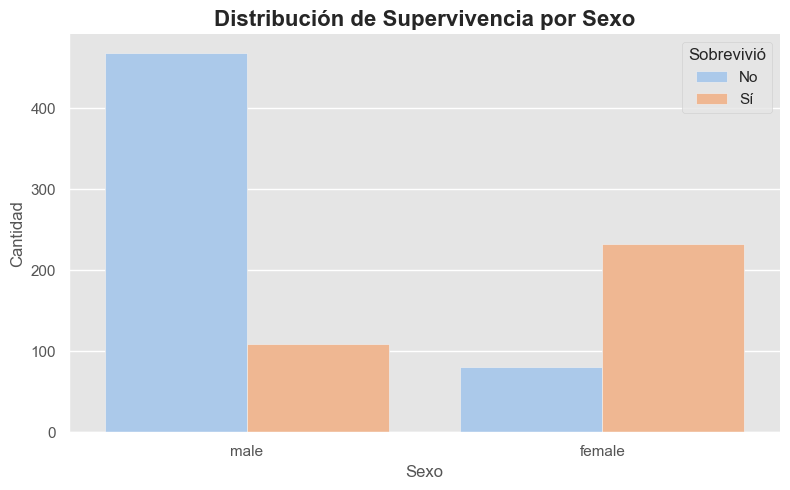

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Sex', hue='Survived', palette='pastel')
plt.title("Distribución de Supervivencia por Sexo", fontsize=16, fontweight='bold')
plt.xlabel("Sexo", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.legend(title="Sobrevivió", labels=["No", "Sí"])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### Age

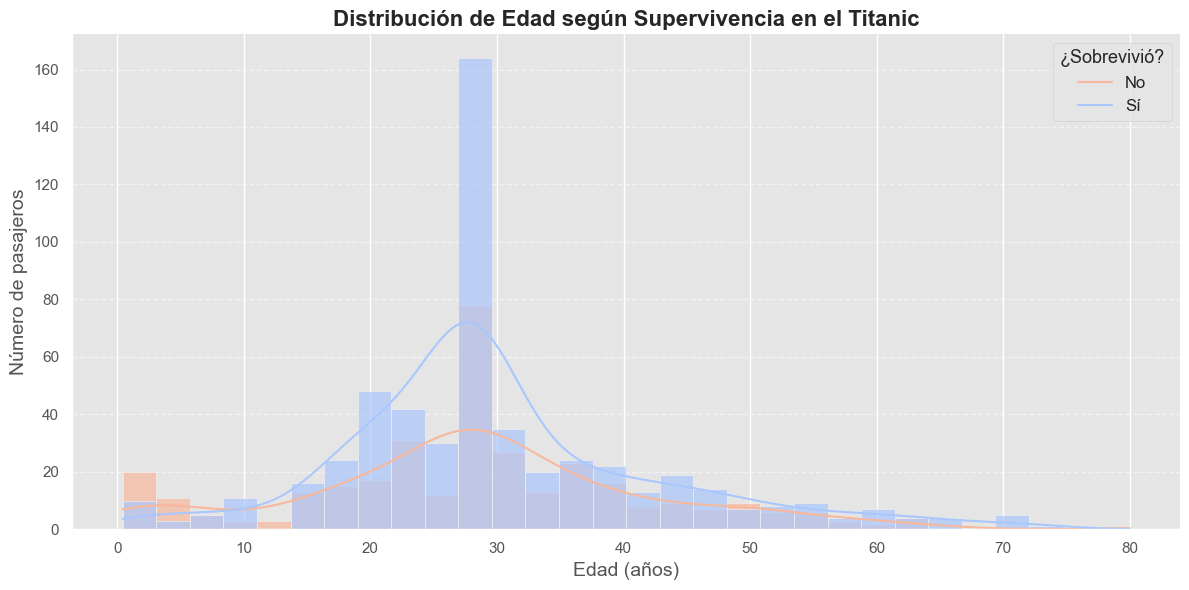

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='Age', hue='Survived', bins=30, kde=True, palette='coolwarm', alpha=0.7)
plt.title("Distribución de Edad según Supervivencia en el Titanic", fontsize=16, fontweight='bold')
plt.xlabel("Edad (años)", fontsize=14)
plt.ylabel("Número de pasajeros", fontsize=14)
plt.legend(title="¿Sobrevivió?", labels=["No", "Sí"], fontsize=12, title_fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.5)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### Psclass

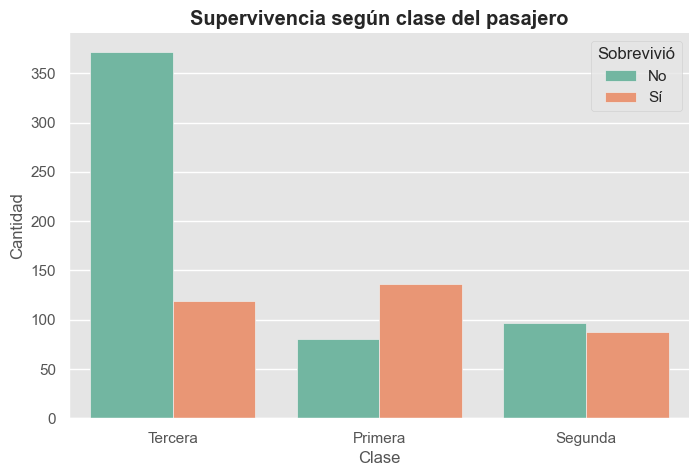

In [11]:
# Mapear Pclass a nombres de clase
df['Clase'] = df['Pclass'].map({1: 'Primera', 2: 'Segunda', 3: 'Tercera'})

# Gráfico actualizado
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Clase', hue='Survived', palette='Set2')
plt.title("Supervivencia según clase del pasajero", fontweight='bold')
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.legend(title="Sobrevivió", labels=["No", "Sí"])

#for spine in plt.gca().spines.values():
#    spine.set_visible(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Embarked

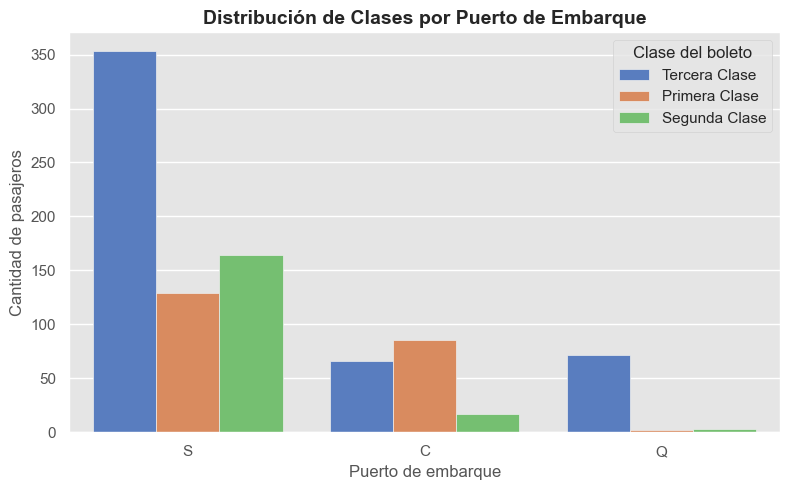

In [12]:
# clases
clase_map = {1: 'Primera Clase', 2: 'Segunda Clase', 3: 'Tercera Clase'}

# Convertir valores de Pclass a nombres descriptivos para la leyenda
df['Clase_nombre'] = df['Pclass'].map(clase_map)

# Gráfico
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Embarked', hue='Clase_nombre', palette='muted')
plt.title("Distribución de Clases por Puerto de Embarque", fontsize=14, fontweight='bold')
plt.xlabel("Puerto de embarque")
plt.ylabel("Cantidad de pasajeros")
plt.legend(title="Clase del boleto", loc='upper right')
plt.tight_layout()
plt.show()


## <strong><font color='blue'> 4. Análisis multivariado (correlación)</font></strong>
El análisis de correlaciones busca descubrir relaciones lineales entre variables numéricas del dataset. Esto permite:
- Identificar variables redundantes que aportan información similar.
- Detectar patrones relevantes que puedan ayudar en la construcción de modelos predictivos.
- Evaluar posibles confusiones estadísticas o relaciones espurias.
- Priorizar variables con mayor relación con la variable objetivo (Survived).

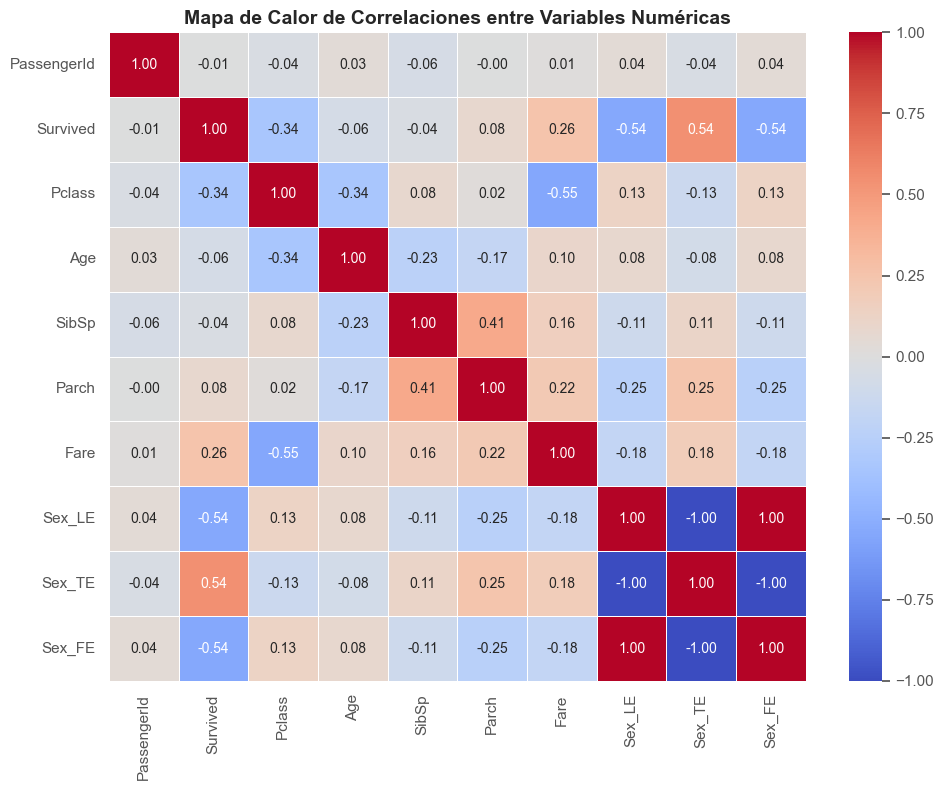

In [13]:
# Selección de columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Verificación y visualización de la matriz de correlación
if not numeric_df.empty and not numeric_df.corr().isnull().all().all():
    plt.figure(figsize=(10,8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f",
                vmin=-1, vmax=1, linewidths=0.5, linecolor='white',
                mask=numeric_df.corr().isnull())
    plt.title("Mapa de Calor de Correlaciones entre Variables Numéricas", fontsize=14, fontweight='bold')

    # Limpiar bordes superiores/derechos
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No hay columnas numéricas válidas para calcular correlaciones.")


### Principales Conclusiones
Este estudio utilizó un mapa de calor para visualizar las correlaciones entre variables numéricas del dataset Titanic, ayudando a identificar relaciones relevantes para análisis y modelado predictivo.

#### 1. `Fare` vs `Pclass` →  Correlación negativa significativa
- Los pasajeros de **Primera Clase** pagaron boletos más costosos.
- Refleja una clara relación entre clase socioeconómica y precio.

#### 2. `Survived` vs `Fare` y `Pclass` →  Correlaciones relevantes
- **`Survived` y `Fare`:** correlación positiva — pasajeros que pagaron más tendieron a sobrevivir.
- **`Survived` y `Pclass`:** correlación negativa — los de clase más baja sobrevivieron menos.
- Estas variables pueden ser **predictoras clave** en modelos de clasificación.

#### 3. `SibSp` vs `Parch` →  Correlación positiva
- Las personas que viajaban con hermanos/esposos también tenían padres/hijos a bordo.
- Indica presencia de núcleos familiares, relevante en estudios de comportamiento.

#### 4. `Age` →  Correlaciones débiles
- No muestra una relación lineal fuerte con otras variables numéricas.
- Su efecto podría ser **no lineal** o condicional (por ejemplo, edad extrema protegida).


#### Conclusión

Este análisis identifica patrones socioeconómicos y familiares que influyen en la probabilidad de supervivencia. 

## <strong><font color='blue'> 5. Detección de outliers</font></strong>

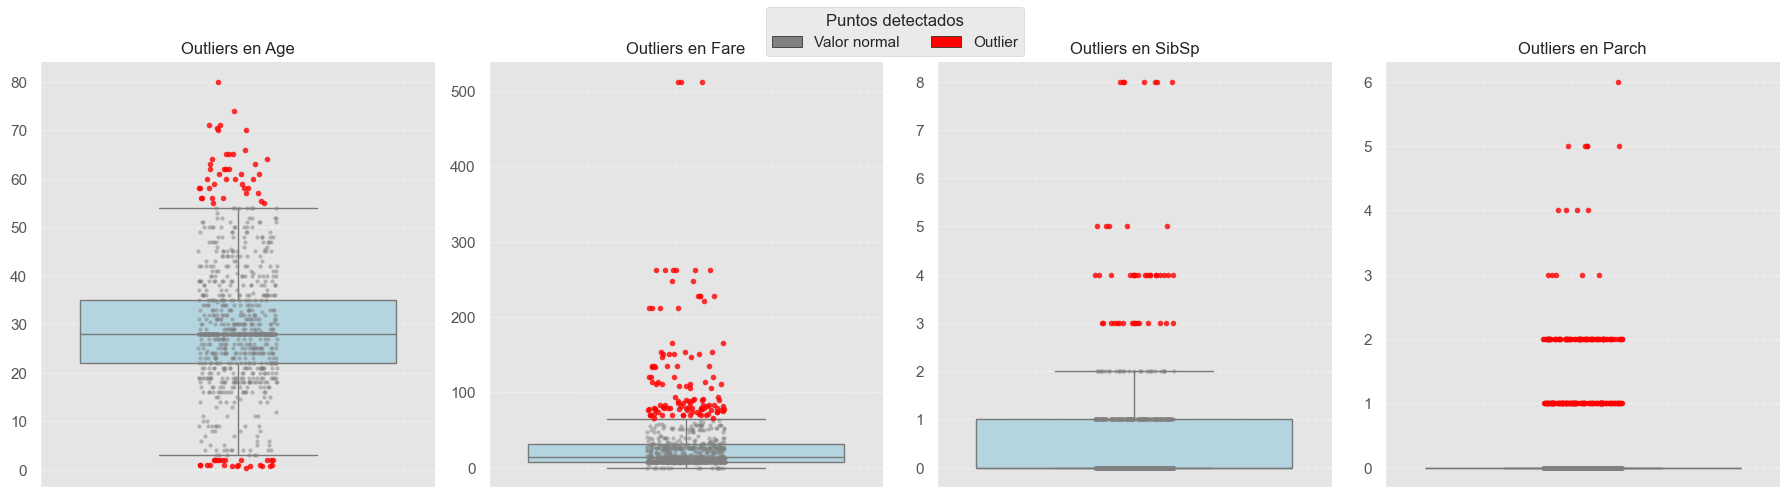

In [15]:
from matplotlib.patches import Patch

# Variables a analizar
variables = ['Age', 'Fare', 'SibSp', 'Parch']
color_normales = 'gray'
color_outliers = 'red'

# Visualización
fig, axes = plt.subplots(1, len(variables), figsize=(18,5))

for i, var in enumerate(variables):
    ax = axes[i]

    # IQR p
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Separar datos
    normales = df[(df[var] >= lower) & (df[var] <= upper)][var]
    outliers = df[(df[var] < lower) | (df[var] > upper)][var]

    # Boxplot 
    sns.boxplot(y=df[var], ax=ax, color='lightblue', fliersize=0)

    # Puntos normales y outliers
    sns.stripplot(y=normales, ax=ax, color=color_normales, size=3, jitter=True, alpha=0.5)
    sns.stripplot(y=outliers, ax=ax, color=color_outliers, size=4, jitter=True, alpha=0.8)

    ax.set_title(f"Outliers en {var}", fontsize=12)
    ax.set_ylabel("")
    ax.grid(axis='y', linestyle='--', alpha=0.4)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# leyenda manual
legend_elements = [
    Patch(facecolor=color_normales, edgecolor='k', label='Valor normal'),
    Patch(facecolor=color_outliers, edgecolor='k', label='Outlier')
]
fig.legend(handles=legend_elements, loc='upper center', ncol=2, fontsize=11, title='Puntos detectados')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # espacio para la leyenda superior
plt.show()


### Principales observaciones visuales

Este análisis explora la presencia de outliers en las variables numéricas clave del dataset Titanic, utilizando la regla de 1.5×IQR y visualizando los valores extremos con color rojo para mayor claridad:

| Variable | Valores normales | Outliers detectados | Rango aceptable (IQR) |
|----------|------------------|----------------------|------------------------|
| `Fare`   | Mayoría dentro de rango medio | Pasajes extremadamente caros sobresalen | \$7.91 – \$65.64 |
| `Age`    | Principalmente adultos jóvenes | Extremadamente jóvenes o muy mayores | 20.13 – 48.12 años |
| `SibSp`  | Viajaban solos o con 1 acompañante | Casos con ≥ 4 hermanos/esposos | 0 – 1 |
| `Parch`  | Viajaban sin padres/hijos | Casos con ≥ 4 familiares directos | 0 – 1 |

**Conclusiones**
- Las variables `Fare` y `Age` exhibieron las **mayores dispersiones**.
- Correlacionar los outliers con `Survived` para detectar patrones de comportamiento excepcionales.

## <strong><font color='blue'> 6. Visualización interactiva con Plotly </font></strong>

In [ ]:
import plotly.express as px

fig = px.scatter(df, x="Age", y="Fare", color="Survived", size='Pclass',
                 hover_data=['Sex', 'Embarked'])
fig.show()


In [ ]:
# Variables a evaluar
variables = ['Age', 'Fare', 'SibSp', 'Parch']
data_plotly = []

# Detectar outliers por variable
for var in variables:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Crear columna de flag
    df[f'{var}_outlier'] = df[var].apply(lambda x: 'Outlier' if (x < lower or x > upper) else 'Normal')

    # Crear DataFrame para Plotly
    temp = df[[var, f'{var}_outlier']].copy()
    temp['Variable'] = var
    temp.rename(columns={var: 'Valor', f'{var}_outlier': 'Tipo'}, inplace=True)
    data_plotly.append(temp)

# Unir todo
plot_df = pd.concat(data_plotly, ignore_index=True)

# Visualización
fig = px.box(plot_df, x="Variable", y="Valor", color="Tipo", 
             points="all", title="Outliers Interactivos por Variable Numérica",
             color_discrete_map={'Normal': 'lightgray', 'Outlier': 'red'},
             hover_data={'Valor': True, 'Tipo': True})

fig.update_layout(
    font=dict(size=12),
    boxmode='group',
    legend_title='Tipo de dato',
    yaxis_title="Valor",
    xaxis_title="Variable",
    height=600
)

fig.show()


###  Hallazgos clave

Mediante el uso de Plotly, se construyó una visualización interactiva que compara las distribuciones de variables numéricas (`Age`, `Fare`, `SibSp`, `Parch`) del dataset Titanic, destacando los valores atípicos (outliers) con color rojo frente a los valores normales en gris.

#### 1. `Fare`: la variable con mayor cantidad de outliers
- Se observan tarifas extremadamente altas asociadas a boletos de lujo.
- Los outliers están muy alejados del resto del conjunto, lo que sugiere una distribución muy sesgada.

#### 2. `Age`: dispersión moderada con outliers en los extremos
- Los valores atípicos corresponden a personas muy mayores y muy jóvenes (niños pequeños).
- Esto podría estar vinculado a patrones de supervivencia diferenciados.

#### 3. `SibSp` y `Parch`: concentraciones normales con pocos outliers
- La mayoría de los pasajeros viajaban solos o con un acompañante.
- Los outliers reflejan familias numerosas y casos especiales, con valores poco frecuentes (≥ 4).

#### 4. Interactividad mejora la exploración
- Permite examinar cada punto individual con su tipo (`Outlier` o `Normal`) en el tooltip.
- Posibilidad de hacer zoom, filtrar por variable y detectar comportamiento extremo fácilmente.

### Implicaciones y próximos pasos

- Los outliers pueden influir en modelos predictivos, afectando métricas como precisión o AUC.
- Sería útil cruzar la variable `Tipo` con `Survived` para evaluar si los valores extremos afectan la probabilidad de supervivencia.